In [1]:
import pandas as pd
import os
import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers.merge import concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import  Input, Dense, Conv2D, Dropout, Flatten, MaxPooling2D, LSTM
from keras.datasets import cifar10
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json

Using TensorFlow backend.


In [2]:
def load_data(dataset_path='./npy_files'):
    X = np.load(os.path.join(dataset_path,'X.npy'))
    y = np.load(os.path.join(dataset_path,'y.npy'))
    folds = np.load(os.path.join(dataset_path,'folds.npy'))
    feature_class = np.load(os.path.join(dataset_path, 'feature_class.npy'))
    facs = pd.read_csv('save_data/npy_files/facs_multi.csv',index_col=None)

    # rescale [0,255] -> [0,2]    
    X = X.astype('float32')/255*2


    return X, y, folds, feature_class, facs

In [3]:
X, y, folds, feature_class, facs = load_data('./save_data/npy_files/')
del facs['Unnamed: 0']
del facs['10']
del facs['26']
del facs['0']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
feature_class_single = np.zeros((1307, 4040))
for index, inst in enumerate(feature_class):
    feature_class_single[index] = inst[0]

In [8]:
facs_train, facs_test, y_train, y_test = \
        train_test_split(facs, y, test_size=0.4)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
decision_tree = DecisionTreeClassifier()

In [11]:
decision_tree.fit(facs_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
y_pred = decision_tree.predict(facs_test)
accuracy_score(y_test, y_pred)

0.9904397705544933

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(decision_tree, out_file=None) 
graph = graphviz.Source(dot_data) 


In [22]:
facs_code = list(facs.columns)

In [23]:
emotion_list = ['Neutral', 'Angry', 'Disgust', 'Fear', 'Happy', 'Sadness',
                          'Surprise', 'Contempt']

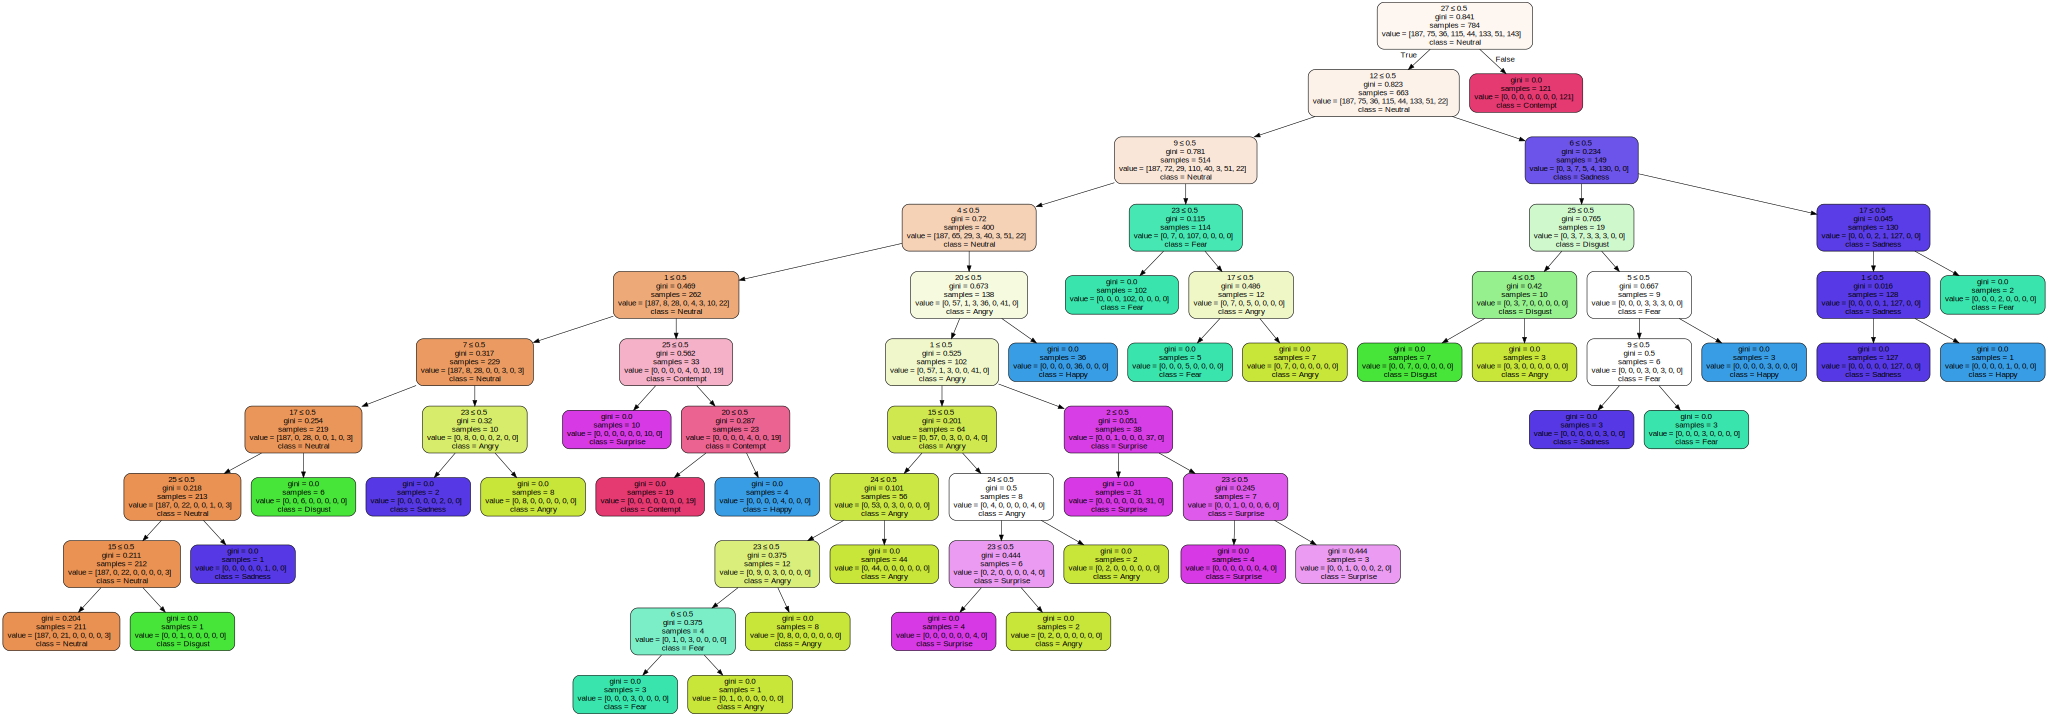

In [26]:
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                        feature_names=facs_code,  
                         class_names=emotion_list,  
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 


In [27]:
graph.render('AU-Emotion.dot')

'AU-Emotion.dot.pdf'